In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [110]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ford-car-price-prediction/ford.csv


In [3]:
df = pd.read_csv(r"datasets/ford.csv")

In [112]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17961,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6
17964,KA,2018,8299,Manual,5007,Petrol,145,57.7,1.2


In [113]:
df.shape

(17966, 9)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [115]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [116]:
df.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

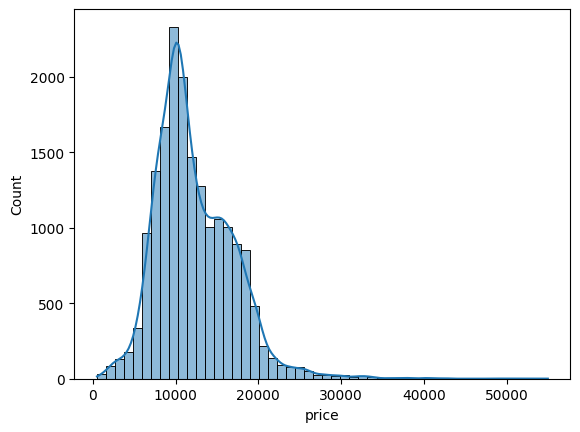

In [117]:
sns.histplot(df["price"], kde=True, bins=50)

<Axes: >

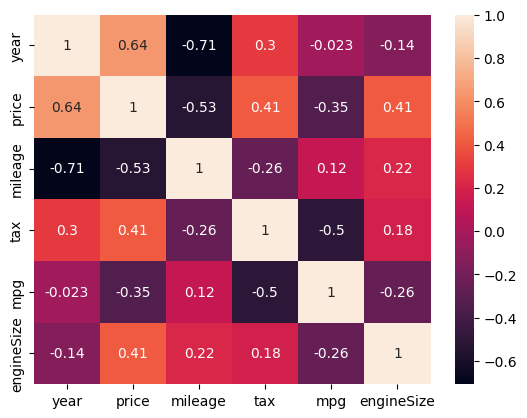

In [118]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

<Axes: xlabel='year', ylabel='price'>

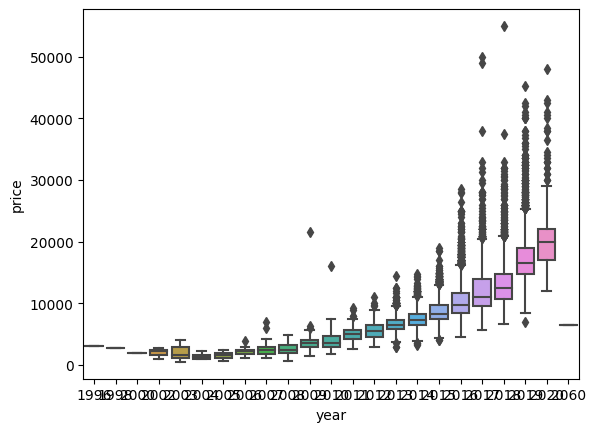

In [119]:
sns.boxplot(df, x="year",y="price")
# plt.xticks(rotation=90)

<Axes: xlabel='mileage', ylabel='price'>

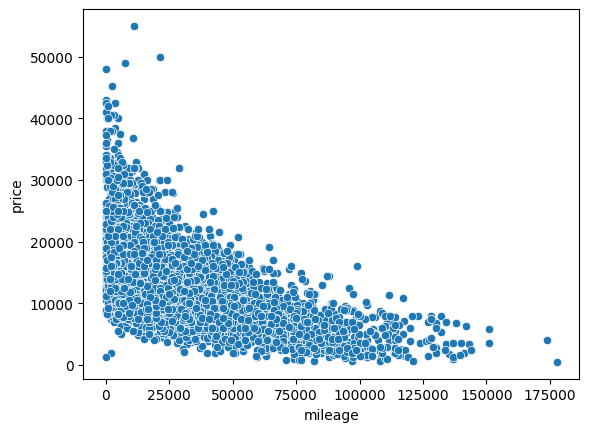

In [120]:
sns.scatterplot(data=df,x="mileage", y="price")

<Axes: xlabel='engineSize', ylabel='price'>

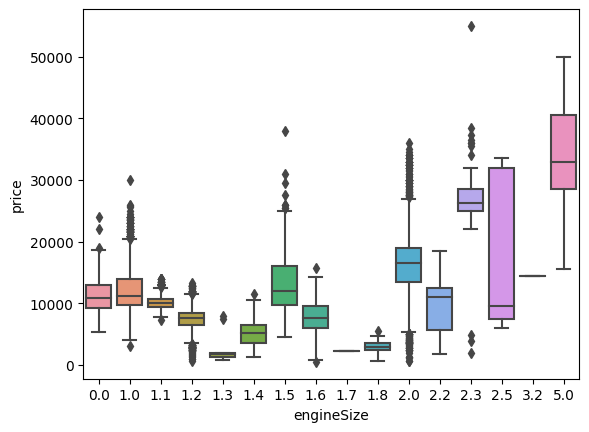

In [121]:
sns.boxplot(df, x="engineSize", y="price")

In [122]:
X = df.drop(columns=["price"], axis=1)
y = df["price"]

In [123]:
y

0        12000
1        14000
2        13000
3        17500
4        16500
         ...  
17961     8999
17962     7499
17963     9999
17964     8299
17965     8299
Name: price, Length: 17966, dtype: int64

In [124]:
X

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...
17961,B-MAX,2017,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,Manual,7010,Diesel,20,67.3,1.6
17964,KA,2018,Manual,5007,Petrol,145,57.7,1.2


In [125]:
X.columns

Index(['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg',
       'engineSize'],
      dtype='object')

In [126]:
X_encode = pd.get_dummies(X,columns=['model', 'transmission', 'fuelType'],drop_first=True)

In [127]:
X_encode=X_encode.astype(int)

In [128]:
X_encode

,year,mileage,tax,mpg,engineSize,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,model_ Fiesta,...,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,model_Focus,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,15944,150,57,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,2018,9083,150,57,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2017,12456,150,57,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,2019,10460,145,40,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
4,2019,1482,145,48,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17961,2017,16700,150,47,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
17962,2014,40700,30,57,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
17963,2015,7010,20,67,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
17964,2018,5007,145,57,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [129]:
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()

In [130]:
col =['model', 'transmission', 'fuelType']

X_label = X
for fea in col:
   X_label[fea] = encode.fit_transform(X_label[fea])

In [131]:
X_label

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,5,2017,0,15944,4,150,57.7,1.0
1,6,2018,1,9083,4,150,57.7,1.0
2,6,2017,1,12456,4,150,57.7,1.0
3,5,2019,1,10460,4,145,40.3,1.5
4,5,2019,0,1482,4,145,48.7,1.0
...,...,...,...,...,...,...,...,...
17961,0,2017,1,16700,4,150,47.1,1.4
17962,0,2014,1,40700,4,30,57.7,1.0
17963,6,2015,1,7010,0,20,67.3,1.6
17964,11,2018,1,5007,4,145,57.7,1.2


In [132]:
std_scale=["mileage" , "year" ,"tax","mpg"]

In [133]:
X_label.columns

Index(['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg',
       'engineSize'],
      dtype='object')

In [135]:
from sklearn.preprocessing import StandardScaler

scaler =StandardScaler()

X_encode[std_scale]=scaler.fit_transform(X_encode[std_scale])
X_label[['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg',
       'engineSize']]=scaler.fit_transform(X_label[['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg',
       'engineSize']])

In [136]:
X_encode

,year,mileage,tax,mpg,engineSize,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,model_ Fiesta,...,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,model_Focus,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,0.065128,-0.380998,0.591358,-0.042122,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0.552866,-0.733359,0.591358,-0.042122,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.065128,-0.560132,0.591358,-0.042122,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,1.040605,-0.662640,0.510727,-1.721198,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
4,1.040605,-1.123724,0.510727,-0.931045,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17961,0.065128,-0.342172,0.591358,-1.029814,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
17962,-1.398088,0.890398,-1.343791,-0.042122,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
17963,-0.910349,-0.839822,-1.505053,0.945569,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
17964,0.552866,-0.942690,0.510727,-0.042122,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [137]:
X_label

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,-0.460699,0.065128,-2.670032,-0.380998,0.688777,0.591358,-0.020442,-0.811386
1,-0.211477,0.552866,0.041351,-0.733359,0.688777,0.591358,-0.020442,-0.811386
2,-0.211477,0.065128,0.041351,-0.560132,0.688777,0.591358,-0.020442,-0.811386
3,-0.460699,1.040605,0.041351,-0.662640,0.688777,0.510727,-1.738890,0.345070
4,-0.460699,1.040605,-2.670032,-1.123724,0.688777,0.510727,-0.909294,-0.811386
...,...,...,...,...,...,...,...,...
17961,-1.706810,0.065128,0.041351,-0.342172,0.688777,0.591358,-1.067312,0.113779
17962,-1.706810,-1.398088,0.041351,0.890398,0.688777,-1.343791,-0.020442,-0.811386
17963,-0.211477,-0.910349,0.041351,-0.839822,-1.454098,-1.505053,0.927668,0.576362
17964,1.034634,0.552866,0.041351,-0.942690,0.688777,0.510727,-0.020442,-0.348804


In [138]:
y

0        12000
1        14000
2        13000
3        17500
4        16500
         ...  
17961     8999
17962     7499
17963     9999
17964     8299
17965     8299
Name: price, Length: 17966, dtype: int64

In [139]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_encode, y, test_size=0.2, random_state=42)

# Create and train the model   --> from one hot encoding
model1 = LinearRegression()
model1.fit(X_train1, y_train1)

# Split into training and testing sets  --> from one label encoding
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_label, y, test_size=0.2, random_state=42)

# Create and train the model
model2 = LinearRegression()
model2.fit(X_train2, y_train2)

LinearRegression()

In [143]:
y_pred1 = model1.predict(X_test1)
y_pred2 = model2.predict(X_test2)
print("One hot pred", y_pred1)
print("label pred", y_pred2)

# Output results
print("Coefficients:", model1.coef_)
print("Intercept:", model1.intercept_)
print("Mean Squared Error:", mean_squared_error(y_test1, y_pred1))
print("R^2 Score:", r2_score(y_test1, y_pred1))

# Output results
print("Coefficients:", model2.coef_)
print("Intercept:", model2.intercept_)
print("Mean Squared Error:", mean_squared_error(y_test2, y_pred2))
print("R^2 Score:", r2_score(y_test2, y_pred2))


One hot pred [ 6866.3580764   9347.6810129   9362.18320785 ... 31454.95287518
  9781.20362786 15253.49970894]
label pred [ 6152.07567671  9374.39134399  9464.92264335 ... 21787.05312508
  9776.43926374 15806.24990719]
Coefficients: [ 2061.43192879 -1305.2686456    -20.89180168  -954.88886809
  2047.60003239   962.7858082   1242.83332624  8310.40436849
 14110.26597885   822.29912514  2960.01499742  3814.08894313
  5792.10251693  1283.83653102  4078.49293132  -662.78050975
 -3010.28817311  3225.7344523   2312.74565455 12468.70390548
  7270.64709611  5209.47157116  5525.60591298  4621.12642437
  3209.01694028  5532.82542096   933.18653368  -622.84130249
  -524.46162772  -249.38453282  1751.28640952 10347.60869186
   717.46311744 -1181.13621682]
Intercept: 9155.006382281135
Mean Squared Error: 3442092.849046357
R^2 Score: 0.8464177711972798
Coefficients: [  109.17038196  2413.79382901   -99.75888432 -1230.03092815
  -596.06184743    60.74998241 -1054.09634238  1813.72506684]
Intercept: 122

In [145]:
r2_1= r2_score(y_test1, y_pred1) 
r2_2=  r2_score(y_test2, y_pred2)

n1 = X_test1.shape[0]
p1 = X_test1.shape[1]

n2 = X_test2.shape[0]
p2 = X_test2.shape[1]


adjusted_r2_1= 1-((1-r2_2)*(n1-1))/(n1-p1-1)
adjusted_r2_2= 1-((1-r2_2)*(n2-1))/(n2-p2-1)

print("Adj R^2 Score1:", adjusted_r2_1)

print("R^2 Score1:",r2_1)

print("Adj R^2 Score2:", adjusted_r2_2)

print("R^2 Score2:",r2_2)

Adj R^2 Score1: 0.7340719935330966
R^2 Score1: 0.8464177711972798
Adj R^2 Score2: 0.7360006206371801
R^2 Score2: 0.7365884288851352
